In [ ]:
# Valent Rafael Somangkey - 0706022210015
# Edward Suwandi - 0706022210008

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/iwakkk/Data-Mining-Dataset/refs/heads/main/ParisHousingClass99.88.csv.xls')
df.sample(n=10)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
2561,69764,94,1,1,73,74348,9,6,2008,0,0,8607,2326,874,0,9,6986164.8,Basic
9627,24628,59,0,1,74,90938,4,7,1998,0,1,9241,2485,505,1,9,2469754.8,Basic
8064,25813,23,1,0,7,84544,5,4,2018,1,1,5695,1411,202,0,3,2586402.8,Luxury
2131,81793,10,0,0,73,95922,2,10,2018,0,0,7377,6263,472,1,4,8184784.8,Basic
8392,67294,98,1,0,83,87213,6,5,2016,1,0,8838,2034,627,1,4,6737871.6,Luxury
4692,32731,99,0,1,66,81770,2,7,1996,1,1,9859,2736,681,1,10,3276617.6,Basic
5631,84118,15,0,1,52,92597,5,1,2006,0,0,2660,9776,785,1,2,8416992.6,Basic
9438,59213,78,1,0,60,14101,10,9,2001,0,0,100,4708,957,1,2,5929279.1,Basic
1256,85083,70,0,0,33,15966,6,10,1994,1,1,1697,6032,573,1,3,8511641.4,Basic
3711,71517,54,0,1,89,6242,3,9,2009,0,0,2530,2837,325,1,8,7160579.9,Basic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
df.isnull().sum()

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


In [ ]:
print(df['category'].unique())

['Basic' 'Luxury']


In [ ]:
df.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


<ipython-input-81-e8aee4df2375>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='Set2')


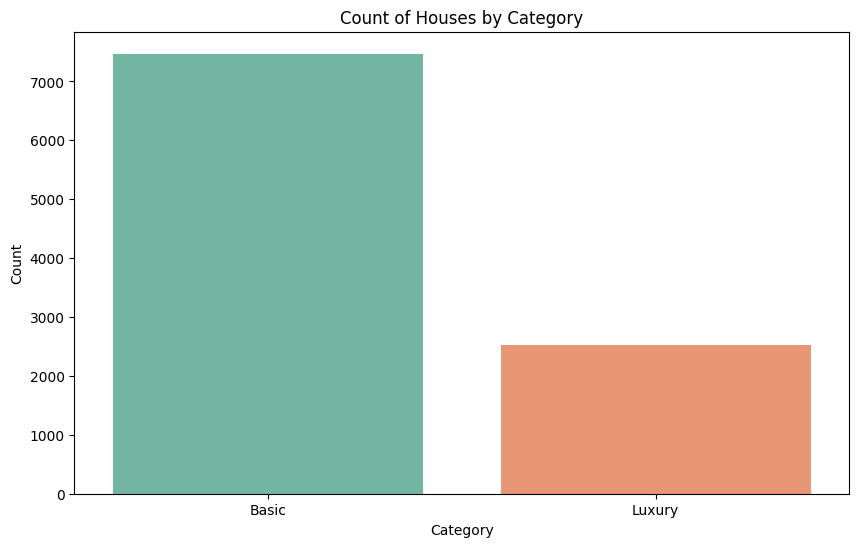

<ipython-input-81-e8aee4df2375>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hasYard', data=df, palette='Set1')


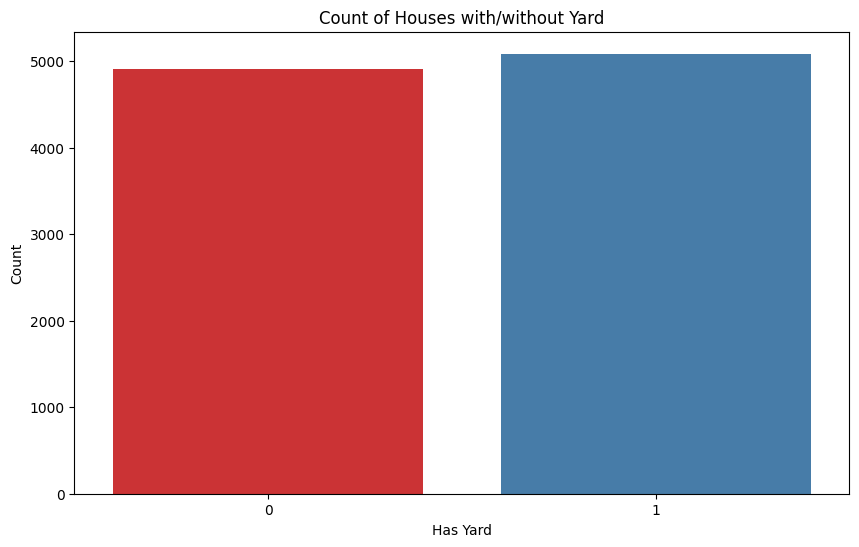

In [ ]:
# VISUALISASI

# Bar Plot for categorical feature 'category'
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, palette='Set2')
plt.title("Count of Houses by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Bar Plot for categorical feature 'hasYard'
plt.figure(figsize=(10, 6))
sns.countplot(x='hasYard', data=df, palette='Set1')
plt.title("Count of Houses with/without Yard")
plt.xlabel("Has Yard")
plt.ylabel("Count")
plt.show()

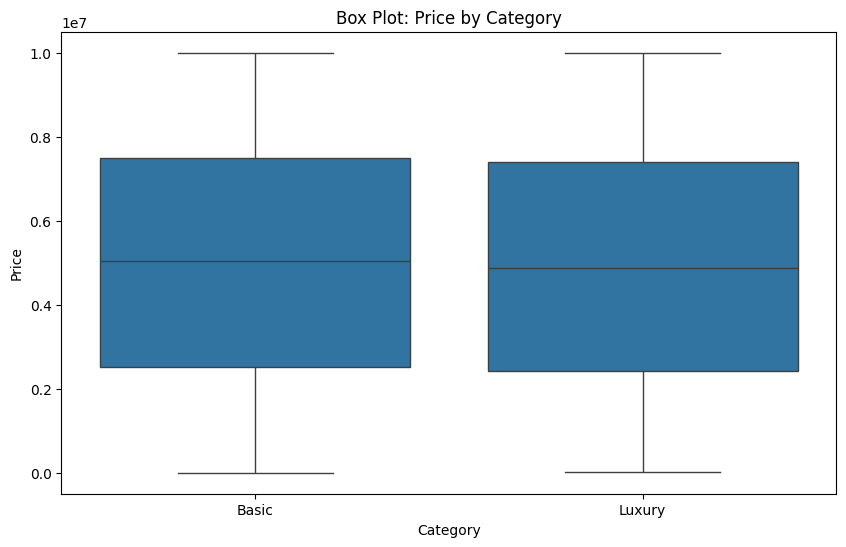

In [ ]:
# VISUALISASI
# Box Plot for detecting outliers (price by category)
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='price', data=df)
plt.title("Box Plot: Price by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.show()

In [ ]:
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
df.sample(n = 5)
# to convert categorical data into numerical labels.

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
4656,20818,43,0,1,76,99647,10,2,2007,1,0,4111,4176,915,0,7,2090473.7,0
9374,67417,68,0,0,67,3056,9,2,1990,1,0,1335,2071,815,1,8,6743688.0,0
7372,44908,41,1,1,22,84564,7,4,2008,1,0,8628,7440,512,1,2,4500929.8,1
3188,8537,59,1,0,49,19292,9,8,1998,1,1,3152,3491,238,0,7,859540.8,1
5189,2434,16,1,1,18,62698,9,5,2013,0,0,5345,890,884,1,3,253611.3,0


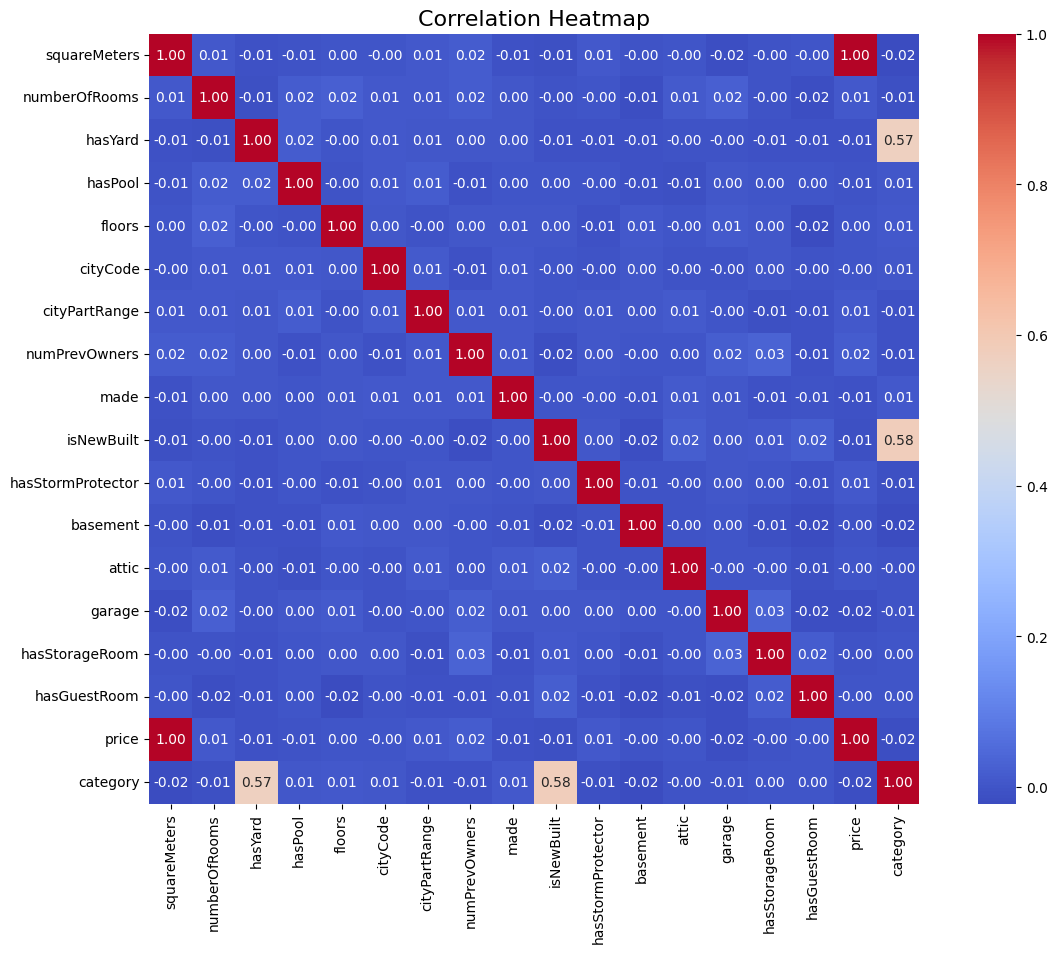

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [ ]:
X = df.drop(['category'], axis = 1)
y = df['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((8000, 17), (2000, 17))

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 42)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini: 0.9985


In [ ]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.9985
Training accuracy: 0.9989


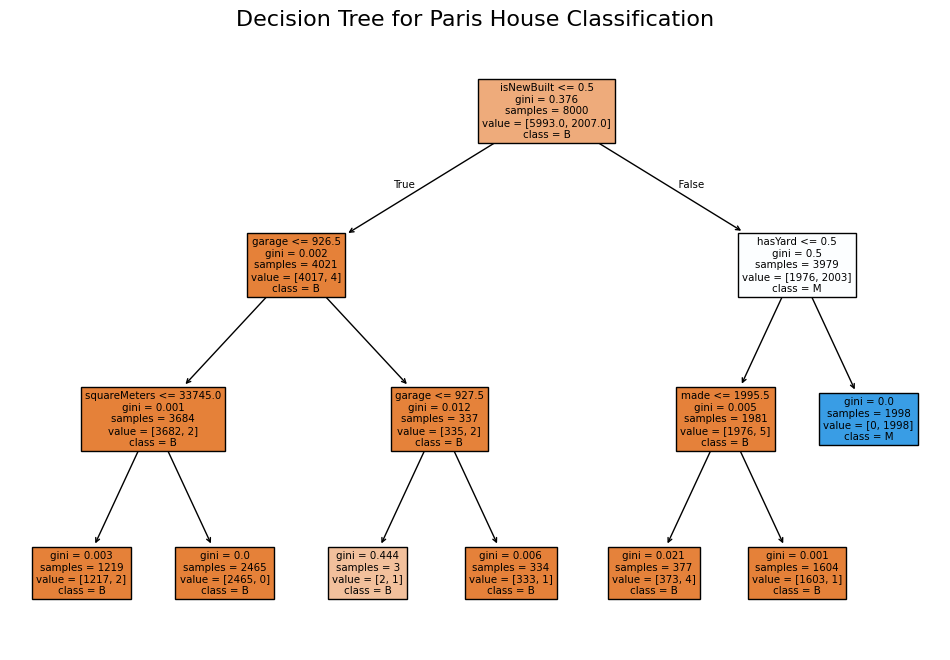

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.title('Decision Tree for Paris House Classification', fontsize=16)
plt.show()

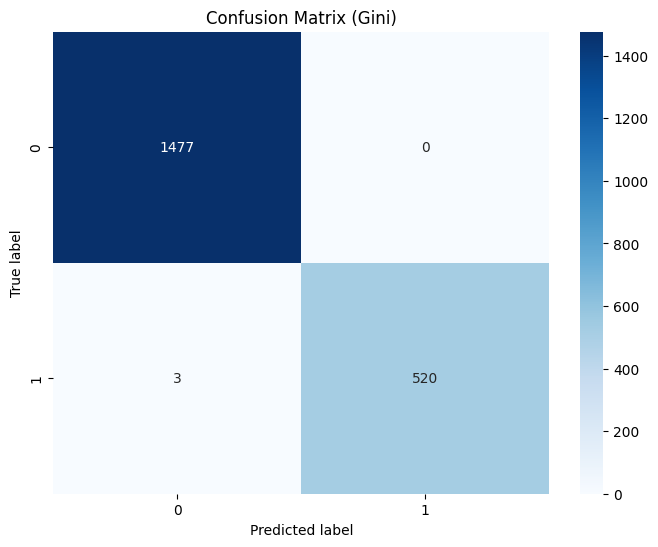

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:

class_report_en = classification_report(y_test, y_pred_gini)

print("Classification Report Gini: \n", class_report_en)

Classification Report Gini: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1477
           1       1.00      0.99      1.00       523

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

Model accuracy score: 0.7385


In [ ]:
y_train_nb = nb.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_nb)
training_accuracy = accuracy_score(y_train, y_train_nb)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

Testing accuracy: 0.7385
Training accuracy: 0.7491


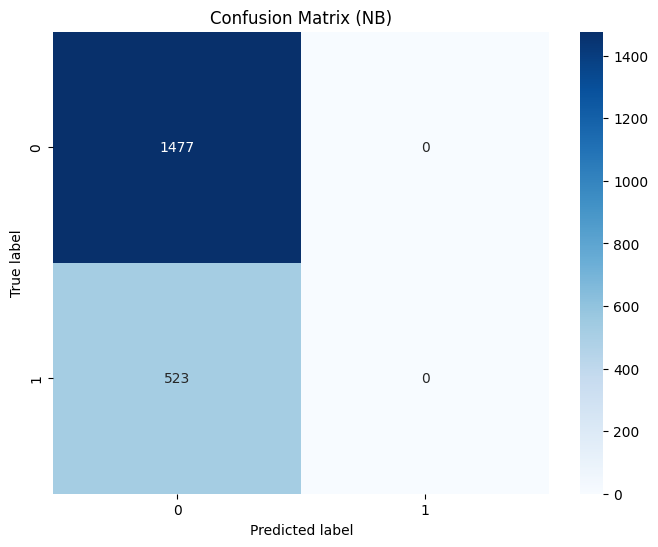

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix (NB)')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:

class_report_en = classification_report(y_test, y_pred_nb)

print("Classification Report NB: \n", class_report_en)

Classification Report NB: 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1477
           1       0.00      0.00      0.00       523

    accuracy                           0.74      2000
   macro avg       0.37      0.50      0.42      2000
weighted avg       0.55      0.74      0.63      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
sqm_price = df[['squareMeters', 'price']]

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sqm_price)
scaled_data = pd.DataFrame(scaled_data, columns=['squareMeters', 'price'])

In [ ]:
scaled_data.describe()

,squareMeters,price
count,1.000000e+04,1.000000e+04
mean,-1.167066e-16,-1.243450e-17
std,1.000050e+00,1.000050e+00
min,-1.730137e+00,-1.731890e+00
25%,-8.609351e-01,-8.608983e-01
50%,8.180215e-03,7.900786e-03
75%,8.598225e-01,8.604115e-01
max,1.742223e+00,1.742383e+00


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

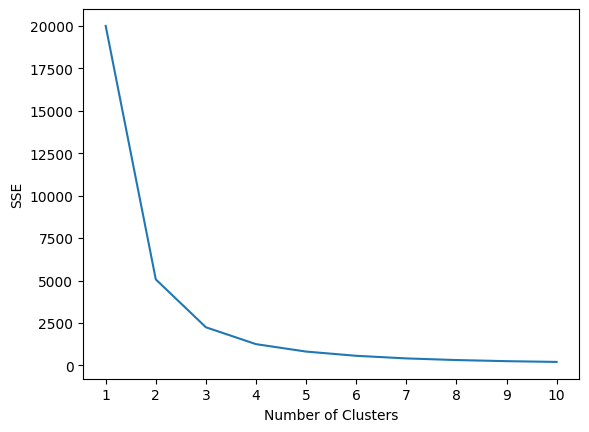

In [ ]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

print(f"The optimal number of clusters (K) is: {kl.elbow}")

The optimal number of clusters (K) is: 3


In [ ]:
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
y_pred = kmeans.fit_predict(scaled_data)

In [ ]:
original_data = scaler.inverse_transform(scaled_data)
original_data = pd.DataFrame(original_data, columns=['squareMeters', 'price'])
df['Cluster'] = y_pred

In [ ]:
df['squareMeters'] = original_data['squareMeters']
df['price'] = original_data['price']

In [ ]:
df['Cluster'].value_counts().sort_index()

,count
Cluster,
0,3313
1,3296
2,3391


In [ ]:
cluster_summary_by_kmeans = df.groupby('Cluster').agg({
    'squareMeters': ['mean', 'min', 'max'],
    'price': ['mean', 'min', 'max']
})

# Rename the index to "KMeans"
cluster_summary_by_kmeans = cluster_summary_by_kmeans.rename_axis("Cluster")

# Transpose the table
kmeans_cluster_summary_transposed = cluster_summary_by_kmeans.T

# Rename the columns with "Cluster {cluster_number}"
new_columns = [f"Cluster {col}" for col in kmeans_cluster_summary_transposed.columns]
kmeans_cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

# Display the transposed table
kmeans_cluster_summary_transposed

KMeans                Cluster 0     Cluster 1     Cluster 2
squareMeters mean  8.312539e+04  1.642964e+04  4.988346e+04
             min   6.654200e+04  8.900000e+01  3.320700e+04
             max   9.999900e+04  3.320500e+04  6.654200e+04
price        mean  8.318948e+06  1.649391e+06  4.994811e+06
             min   6.657977e+06  1.031350e+04  3.327794e+06
             max   1.000677e+07  3.329880e+06  6.661494e+06

In [ ]:
# Conclusion
# Cluster 0 : This cluster represents larger properties with higher prices. It likely corresponds to luxury homes or larger plots of land.
# Cluster 1 : This cluster represents small properties with low prices, likely entry-level homes or budget-friendly options.
# Cluster 2 : This cluster represents moderate-sized properties with mid-range prices, potentially appealing to middle-class buyers or those looking for balanced options.